In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

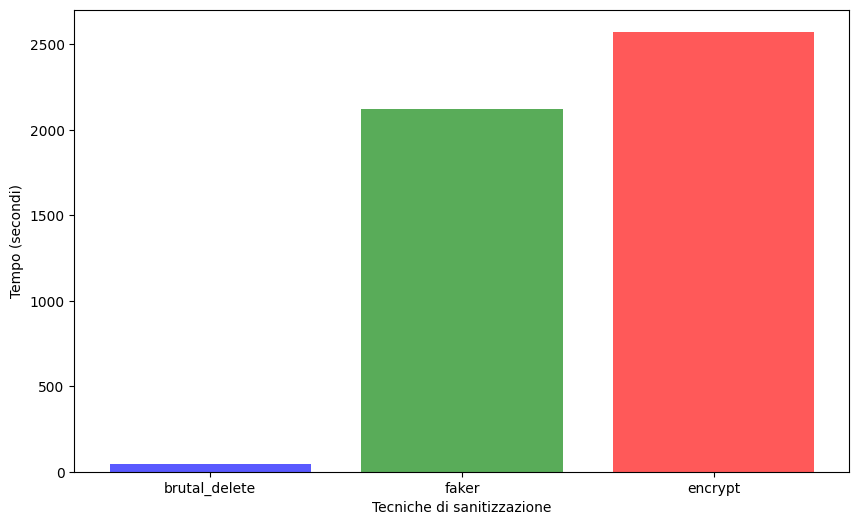

In [2]:
techniques = ['brutal_delete', 'faker', 'encrypt']
times = [43.89, 2122.07, 2573.47]

plt.figure(figsize=(10, 6))
plt.bar(techniques, times, color=['blue', 'green', 'red'], alpha = 0.65)

plt.xlabel('Tecniche di sanitizzazione')
plt.ylabel('Tempo (secondi)')
plt.show()

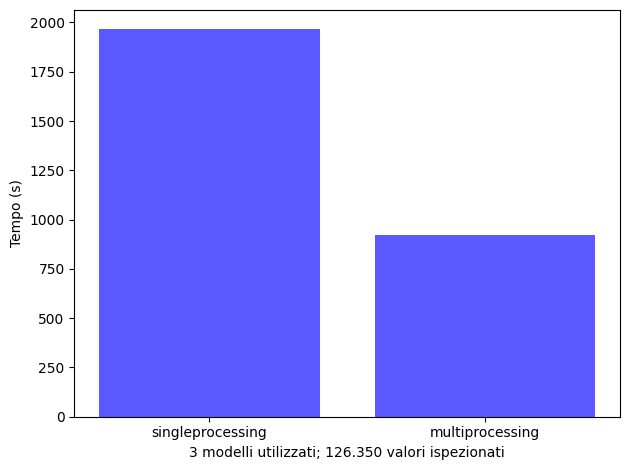

In [3]:
sanitization = ["singleprocessing", "multiprocessing"]
times = [1964.91, 922.66]

plt.bar(sanitization, times, color='blue', alpha = 0.65)
plt.xlabel('3 modelli utilizzati; 126.350 valori ispezionati')
plt.ylabel('Tempo (s)')
plt.tight_layout()
plt.show()

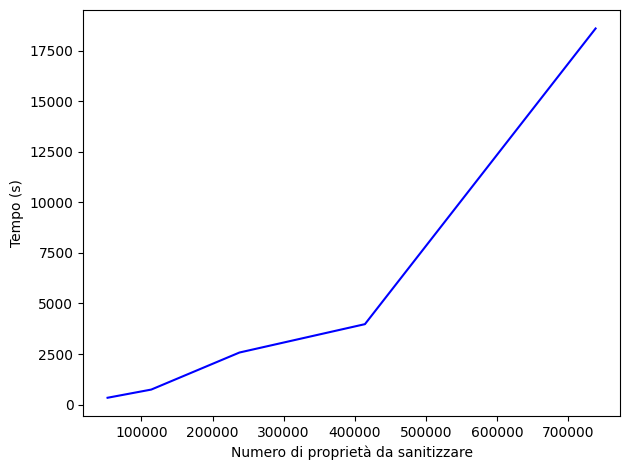

In [4]:
properties = [52364, 113823, 237878, 414297, 738684]
values = [19803, 27383, 52978, 52978, 106851]
times = [336.27, 741.21, 2573.47, 3975.57, 18597.24]

tot = [v+times[i] for i, v in enumerate(values)]

plt.plot(properties, times, color='blue')
plt.xlabel('Numero di proprietà da sanitizzare')
plt.ylabel('Tempo (s)')
plt.tight_layout()
plt.show()


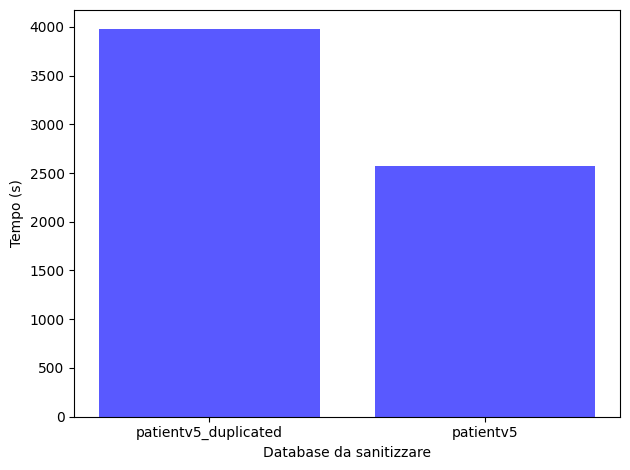

In [5]:
dbs = ["patientv5_duplicated", "patientv5"]  
times = [3975.57, 2573.47]
properties = [414297, 237878]

plt.bar(dbs, times, color='blue', alpha = 0.65)
plt.xlabel('Database da sanitizzare')
plt.ylabel('Tempo (s)')
plt.tight_layout()
plt.show()

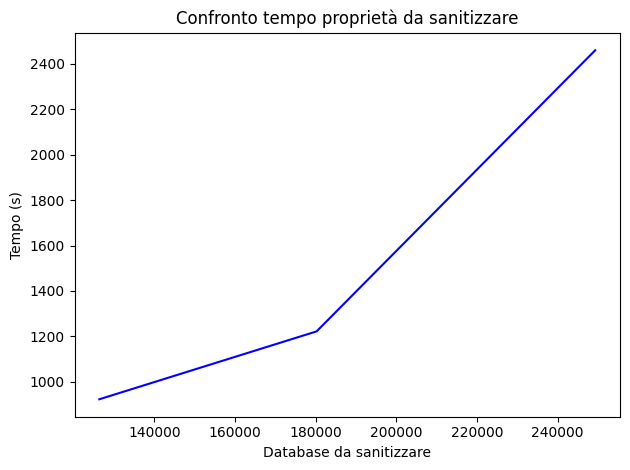

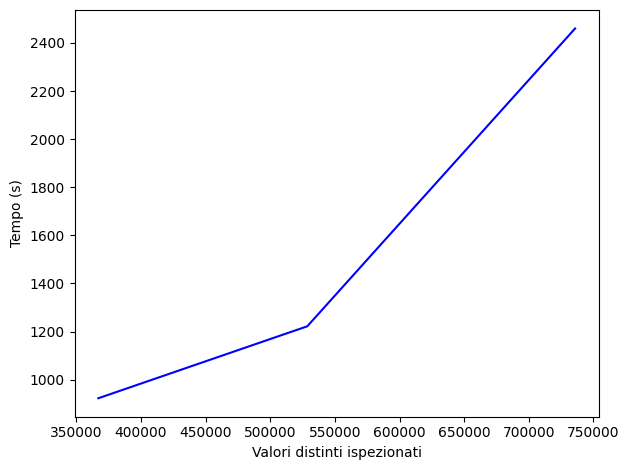

In [6]:
times = [922.66, 1221.78, 2459.94]
properties = [126350, 180223, 249289]
values = [367020, 528639, 735795]

plt.plot(properties, times, color='blue')
plt.title('Confronto tempo proprietà da sanitizzare')
plt.xlabel('Database da sanitizzare')
plt.ylabel('Tempo (s)')
plt.tight_layout()
plt.show()

plt.plot(values, times, color='blue')
plt.xlabel('Valori distinti ispezionati')
plt.ylabel('Tempo (s)')
plt.tight_layout()
plt.show()


In [7]:
solution_warning = 1163 * 5 + 618 + 163 + 948 + 887 + 1163 * 3 + 1163 * 2 + 1137 + 10 + 10 + 7346 * 4 + 1127 * 2 + 974 + 5056 * 3 + 10 + 61459 * 2 + 61459 
solution_non_warning = 1163 + 918 + 1127 + 2 + 13 + 1127 + 5056 * 2 + 10 + 61459 * 4 + 1573 * 2 + 499233 * 2 + 1573 + 1573 + 499233 * 2 + 314695
solution_to_sanitize = 5 + 2 + 2 + 3 + 5 + 4 + 2 + 1 + 3 + 1 + 2 + 1 
solution_not_to_sanitize = 2 + 1 + 1 + 1 + 1 + 1 + 1 + 4 + 2 + 2 + 2 + 3
print("Value to sanitize", solution_warning, "\nValue not to sanitize", solution_non_warning)
print("Property to sanitize", solution_to_sanitize, "\nProperty not to sanitize", solution_not_to_sanitize)

Value to sanitize 247570 
Value not to sanitize 2578227
Property to sanitize 31 
Property not to sanitize 21


VP = quante proprietà che dovevano essere rimosse sono state rimosse
FP = quante proprietà che non dovevano essere rimosse sono state rimosse
VN = quante proprietà che non dovevano essere rimosse non sono state rimosse
FN = quante proprietà che dovevano essere rimosse non sono state rimosse

In [8]:
def plot_confusion_matrixs(property_array, value_array) : 
    data = [
        {"matrix_result": "Properties Sanitized", "confusion_matrix": property_array},
        {"matrix_result": "Values Sanitized", "confusion_matrix": value_array},
    ]

    n_algorithms = len(data)
    fig, axs = plt.subplots(1, n_algorithms, figsize=(5 * n_algorithms, 4.5))

    for i, d in enumerate(data):
        df_cm = pd.DataFrame(d["confusion_matrix"], index=["Positive", "Negative"],
                            columns=["Positive", "Negative"])
        sn.heatmap(df_cm, annot=True, ax=axs[i], cmap="crest", fmt='d')
        axs[i].set_title(d["matrix_result"])

    plt.tight_layout()
    plt.show()

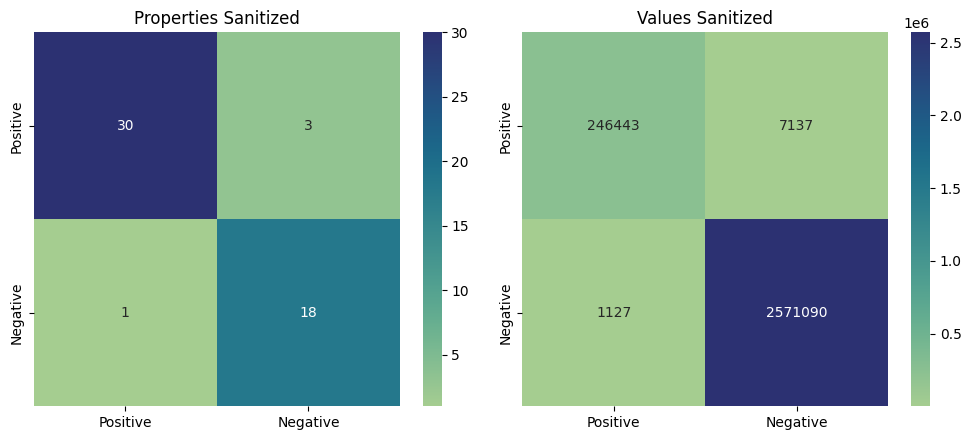

Sensibilità proprietà: 0.967741935483871
Specificità proprietà: 0.8571428571428571
Sensibilità valori: 0.9954477521509069
Specificità valori: 0.997231818610231


In [9]:
chatgpt_FN = 1
chatgpt_VP = solution_to_sanitize - chatgpt_FN
chatgpt_FP = 3
chatgpt_VN = solution_not_to_sanitize - chatgpt_FP

chatgpt_value_FN = 1127 
chatgpt_value_VP = solution_warning - chatgpt_value_FN
chatgpt_value_FP = 1163 + 918 + 5056
chatgpt_value_VN = solution_non_warning - chatgpt_value_FP

property_array = [[chatgpt_VP, chatgpt_FP], [chatgpt_FN, chatgpt_VN]]
value_array = [[chatgpt_value_VP, chatgpt_value_FP], [chatgpt_value_FN, chatgpt_value_VN]]

plot_confusion_matrixs(property_array, value_array) # type: ignore

print("Sensibilità proprietà:", chatgpt_VP / solution_to_sanitize)
print("Specificità proprietà:", chatgpt_VN / solution_not_to_sanitize)

print("Sensibilità valori:", chatgpt_value_VP / solution_warning)
print("Specificità valori:", chatgpt_value_VN / solution_non_warning)

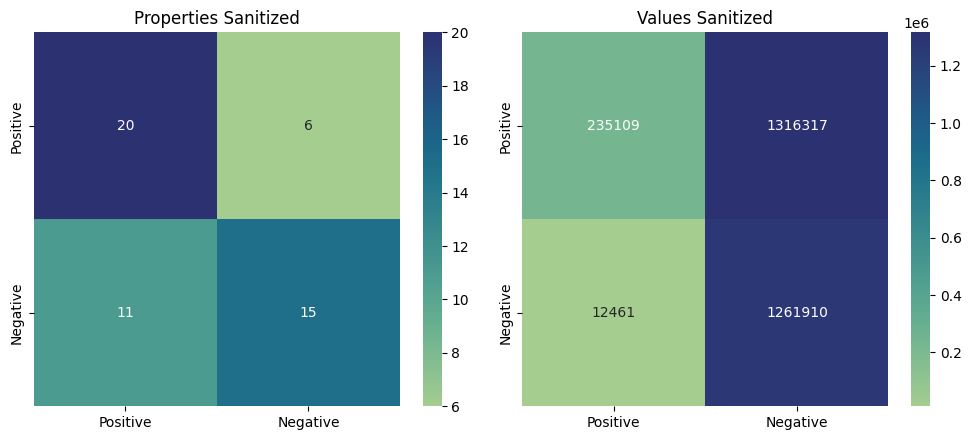

Sensibilità proprietà: 0.6451612903225806
Specificità proprietà: 0.7142857142857143
Sensibilità valori: 0.9496667609161046
Specificità valori: 0.48944875683948696


In [10]:
gemini_FN = 11
gemini_VP = solution_to_sanitize - gemini_FN
gemini_FP = 6
gemini_VN = solution_not_to_sanitize - gemini_FP

gemini_value_FN = 618 + 163 + 1163 * 2 + 887 + 1137 + 10 * 2 + 1127 * 2 + 5056
gemini_value_VP = solution_warning - gemini_value_FN
gemini_value_FP = 10 + 1573 * 2 + 499233 * 2 + 314695
gemini_value_VN = solution_non_warning - gemini_value_FP

property_array = [[gemini_VP, gemini_FP], [gemini_FN, gemini_VN]]
value_array = [[gemini_value_VP, gemini_value_FP], [gemini_value_FN, gemini_value_VN]]

plot_confusion_matrixs(property_array, value_array) # type: ignore

print("Sensibilità proprietà:", gemini_VP / solution_to_sanitize)
print("Specificità proprietà:", gemini_VN / solution_not_to_sanitize)

print("Sensibilità valori:", gemini_value_VP / solution_warning)
print("Specificità valori:", gemini_value_VN / solution_non_warning)

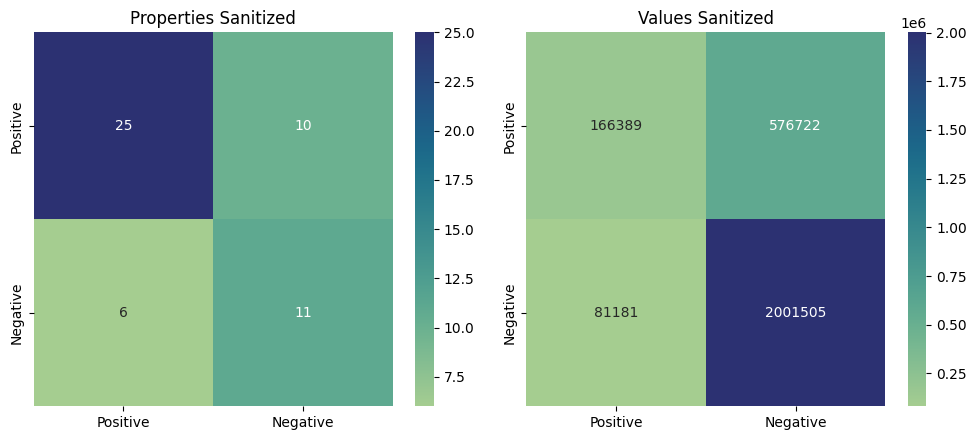

Sensibilità proprietà: 0.8064516129032258
Specificità proprietà: 0.5238095238095238
Sensibilità valori: 0.6720887021852405
Specificità valori: 0.7763106196622718


In [11]:
claude_FN = 6
claude_VP = solution_to_sanitize - claude_FN
claude_FP = 10
claude_VN = solution_not_to_sanitize - claude_FP

claude_value_FN = 7346 + 1127 * 2 + 5056 * 2 + 10 + 61459 
claude_value_VP = solution_warning - claude_value_FN
claude_value_FP = 1163 + 918 + 1127 + 1127 + 5056 * 2 + 10 + 61459 + 499233 + 1573
claude_value_VN = solution_non_warning - claude_value_FP

property_array = [[claude_VP, claude_FP], [claude_FN, claude_VN]]
value_array = [[claude_value_VP, claude_value_FP], [claude_value_FN, claude_value_VN]]

plot_confusion_matrixs(property_array, value_array) # type: ignore

print("Sensibilità proprietà:", claude_VP / solution_to_sanitize)
print("Specificità proprietà:", claude_VN / solution_not_to_sanitize)

print("Sensibilità valori:", claude_value_VP / solution_warning)
print("Specificità valori:", claude_value_VN / solution_non_warning)